In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, plot_betas
import pandas as pd

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options


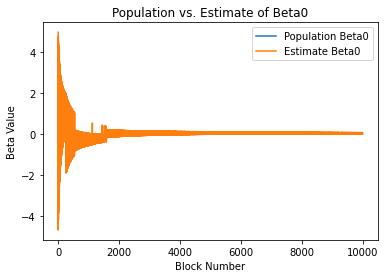

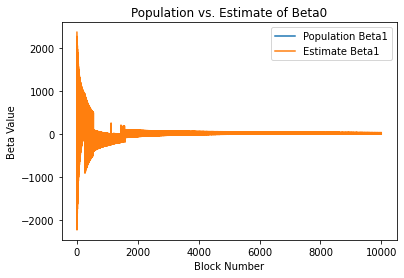

In [2]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])


for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, .001])


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])

df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [3]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.951091,2366.914695,0.0,0.001,1
1,4.912831,2348.624082,0.0,0.001,2
2,-4.675465,-2235.149050,0.0,0.001,3
3,4.803701,2296.453547,0.0,0.001,4
4,4.742581,2267.234627,0.0,0.001,5
...,...,...,...,...,...
9995,-0.000052,-0.024928,0.0,0.001,9996
9996,0.062080,29.677735,0.0,0.001,9997
9997,-0.000051,-0.024357,0.0,0.001,9998
9998,-0.000049,-0.023612,0.0,0.001,9999


## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


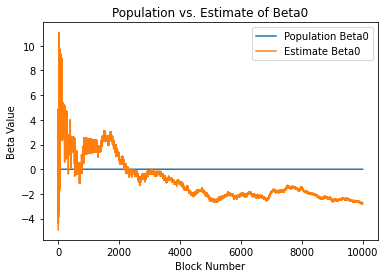

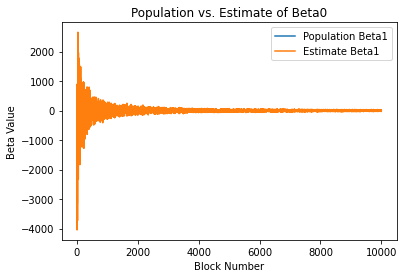

In [4]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [5]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.911427,-2565.989084,0.0,0.001,1
1,4.864229,272.754983,0.0,0.001,2
2,4.817954,246.866307,0.0,0.001,3
3,4.736978,209.490166,0.0,0.001,4
4,4.693199,188.919606,0.0,0.001,5
...,...,...,...,...,...
9995,-2.736295,1.721188,0.0,0.001,9996
9996,-2.736297,1.719730,0.0,0.001,9997
9997,-2.798423,-29.712047,0.0,0.001,9998
9998,-2.736303,6.300191,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

Placeholder has no control action options


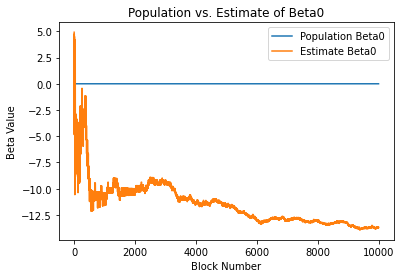

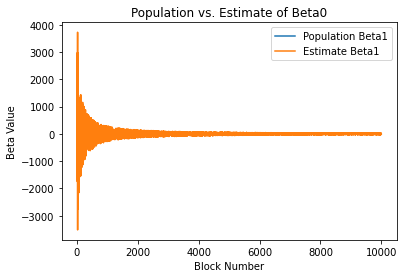

In [6]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = 6000


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [7]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.911488,2498.663411,0.0,0.001,1
1,-4.845131,-1456.635453,0.0,0.001,2
2,4.807790,2543.217396,0.0,0.001,3
3,4.745125,2569.696905,0.0,0.001,4
4,4.710479,2386.611900,0.0,0.001,5
...,...,...,...,...,...
9995,-13.702757,-17.489350,0.0,0.001,9996
9996,-13.640623,12.952015,0.0,0.001,9997
9997,-13.640626,19.921908,0.0,0.001,9998
9998,-13.640629,19.490908,0.0,0.001,9999


In [8]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.3938309600750329


## Sanity Check D

Changing difficulty and V3 mining boundary action

Placeholder has no control action options


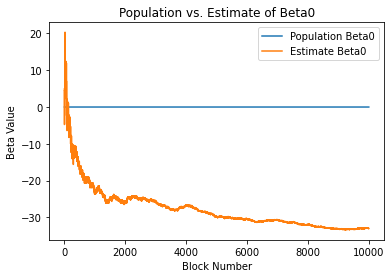

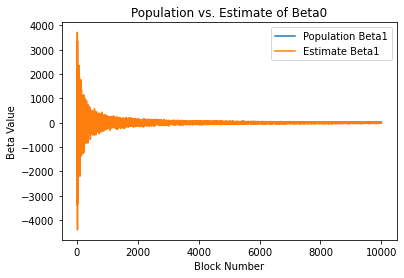

In [9]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [10]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.921281,1822.687518,0.0,0.001,1
1,4.863854,2226.955188,0.0,0.001,2
2,-4.761410,-2441.757961,0.0,0.001,3
3,4.762503,1155.161968,0.0,0.001,4
4,-4.566489,-3376.331293,0.0,0.001,5
...,...,...,...,...,...
9995,-32.928361,15.226791,0.0,0.001,9996
9996,-32.928363,17.938123,0.0,0.001,9997
9997,-32.928364,18.564570,0.0,0.001,9998
9998,-32.928365,19.124022,0.0,0.001,9999


## Sanity Check E

Placeholder has no control action options


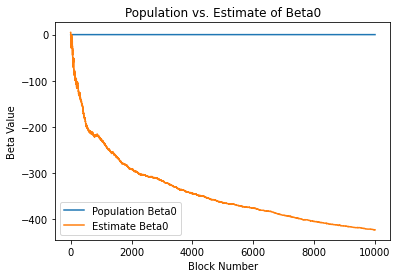

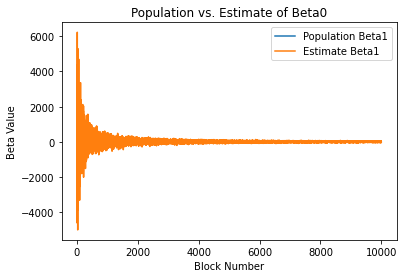

      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0           4.970635     -789.685150               0.0             0.001   
1           5.047176    -4596.250336               0.0             0.001   
2           5.139779     1640.357551               0.0             0.001   
3          -4.366044    -1417.866445               0.0             0.001   
4          -4.357270     -169.790060               0.0             0.001   
...              ...             ...               ...               ...   
9995     -423.330389       37.627440               0.0             0.001   
9996     -423.454654      -38.544796               0.0             0.001   
9997     -423.392523      -34.036786               0.0             0.001   
9998     -423.330400       41.334200               0.0             0.001   
9999     -423.392514       11.371902               0.0             0.001   

      Block Number  
0                1  
1                2  
2                3  
3  

In [11]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])
params["Difficulty Randomness Sigma"] = .25
for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(8000, 2000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)
print(df)